In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

%matplotlib inline



# Data Visualization :

In [2]:
unfiltered_dataset=pd.read_csv("./gbsg.csv")
unfiltered_dataset

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


In [3]:
dataset = unfiltered_dataset.drop(["Unnamed: 0", "pid"],axis="columns")

In [4]:
dataset.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


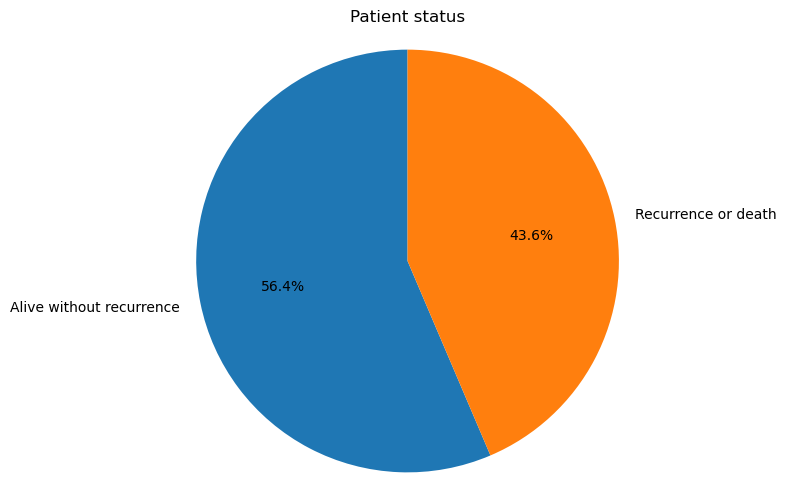

In [5]:
plt.figure(figsize=(6,6))
status_counts=dataset['status'].value_counts()
labels=['Alive without recurrence','Recurrence or death']
plt.pie(status_counts,labels=labels,startangle=90,autopct='%.1f%%')
plt.title("Patient status")
plt.axis('equal')
plt.show()

In [6]:
def plot_histogram(data,columns):
  fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(20,20))
  for i,col in enumerate(columns):
    sns.histplot(data[col],kde=False,ax=axes[i])
    axes[i].set_xlabel(col)
  plt.tight_layout()
  plt.show()

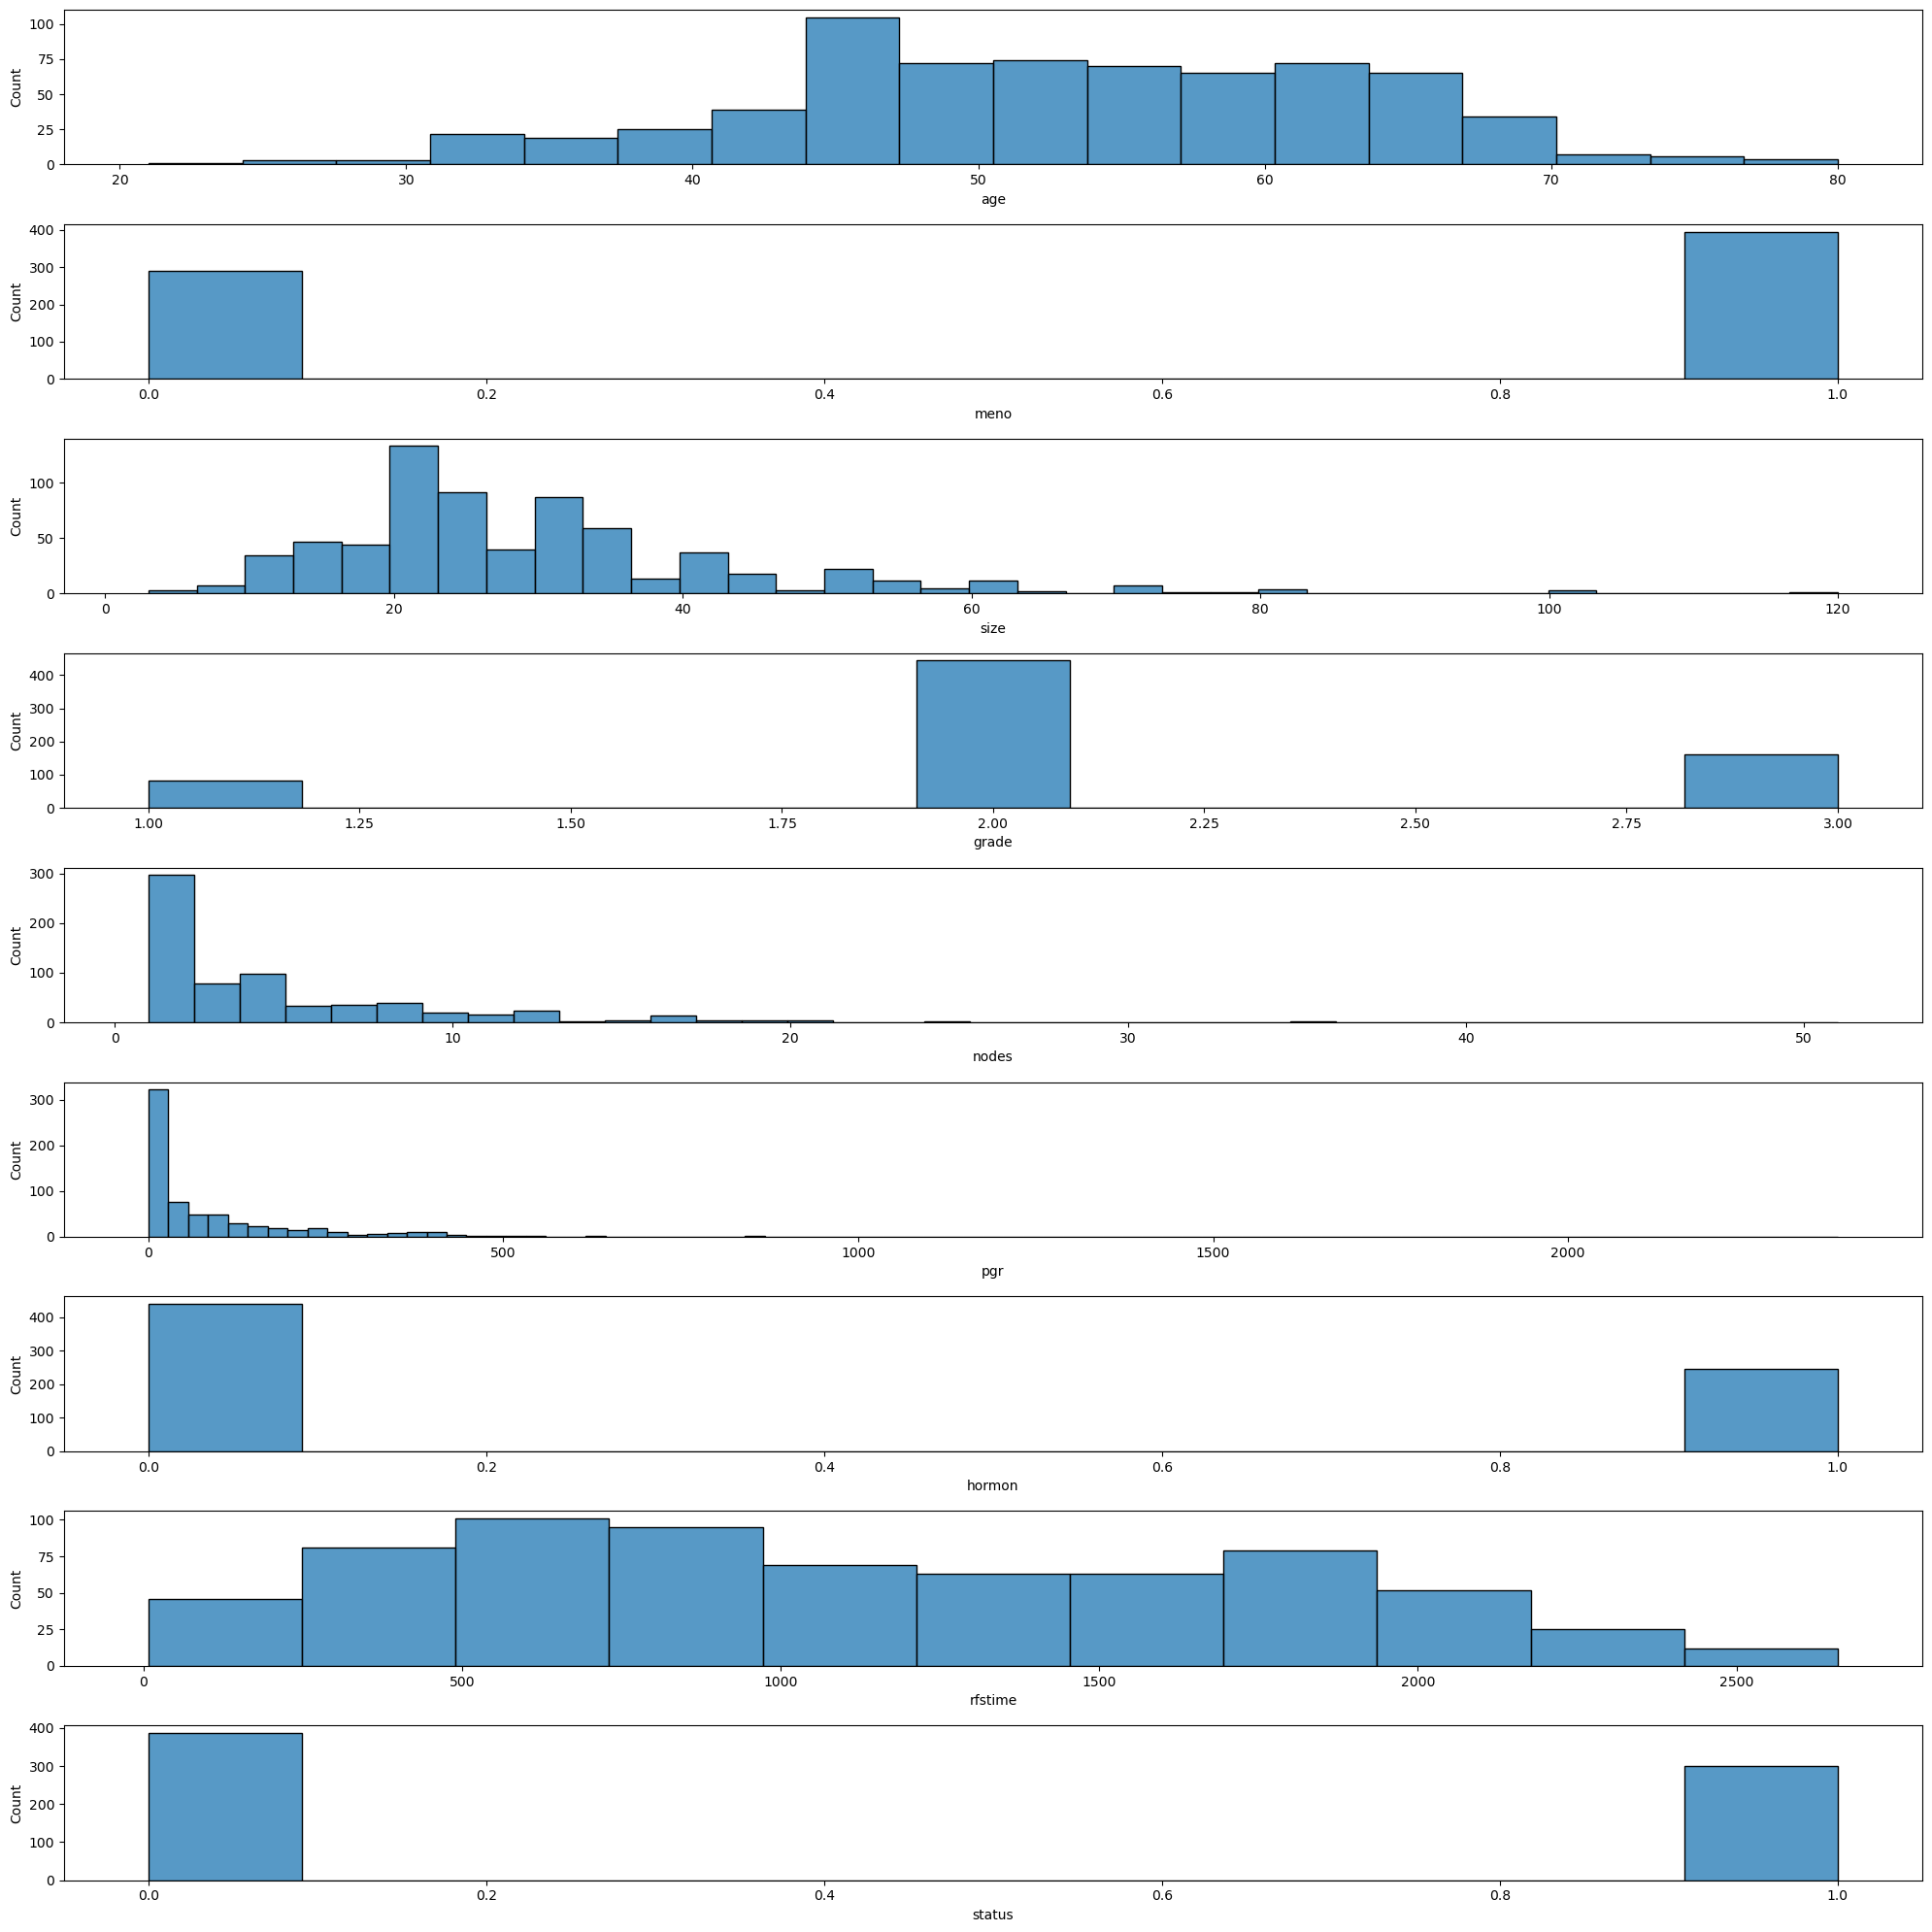

In [7]:
col=['age','meno','size','grade','nodes','pgr','hormon','rfstime','status']
plot_histogram(dataset,col)

<Axes: xlabel='rfstime', ylabel='size'>

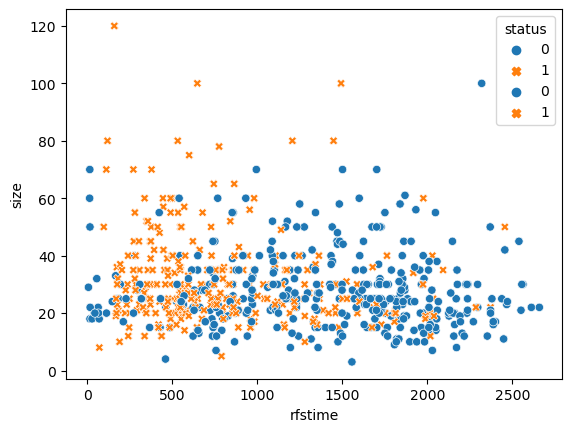

In [8]:
sns.scatterplot(data=dataset, x="rfstime", y="size",hue='status',style="status")
sns.scatterplot(data=dataset, x="rfstime", y="size",hue='status',style="status")

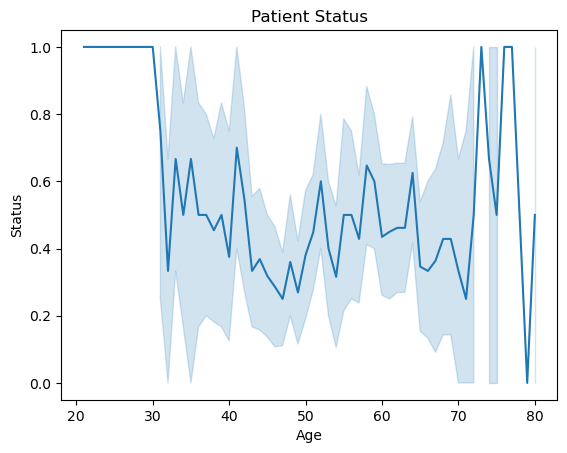

In [9]:
sns.lineplot(x='age',y='status',data=dataset)
plt.title('Patient Status')
plt.xlabel('Age')
plt.ylabel("Status")
plt.show()

# Correlation between various features :

<Axes: >

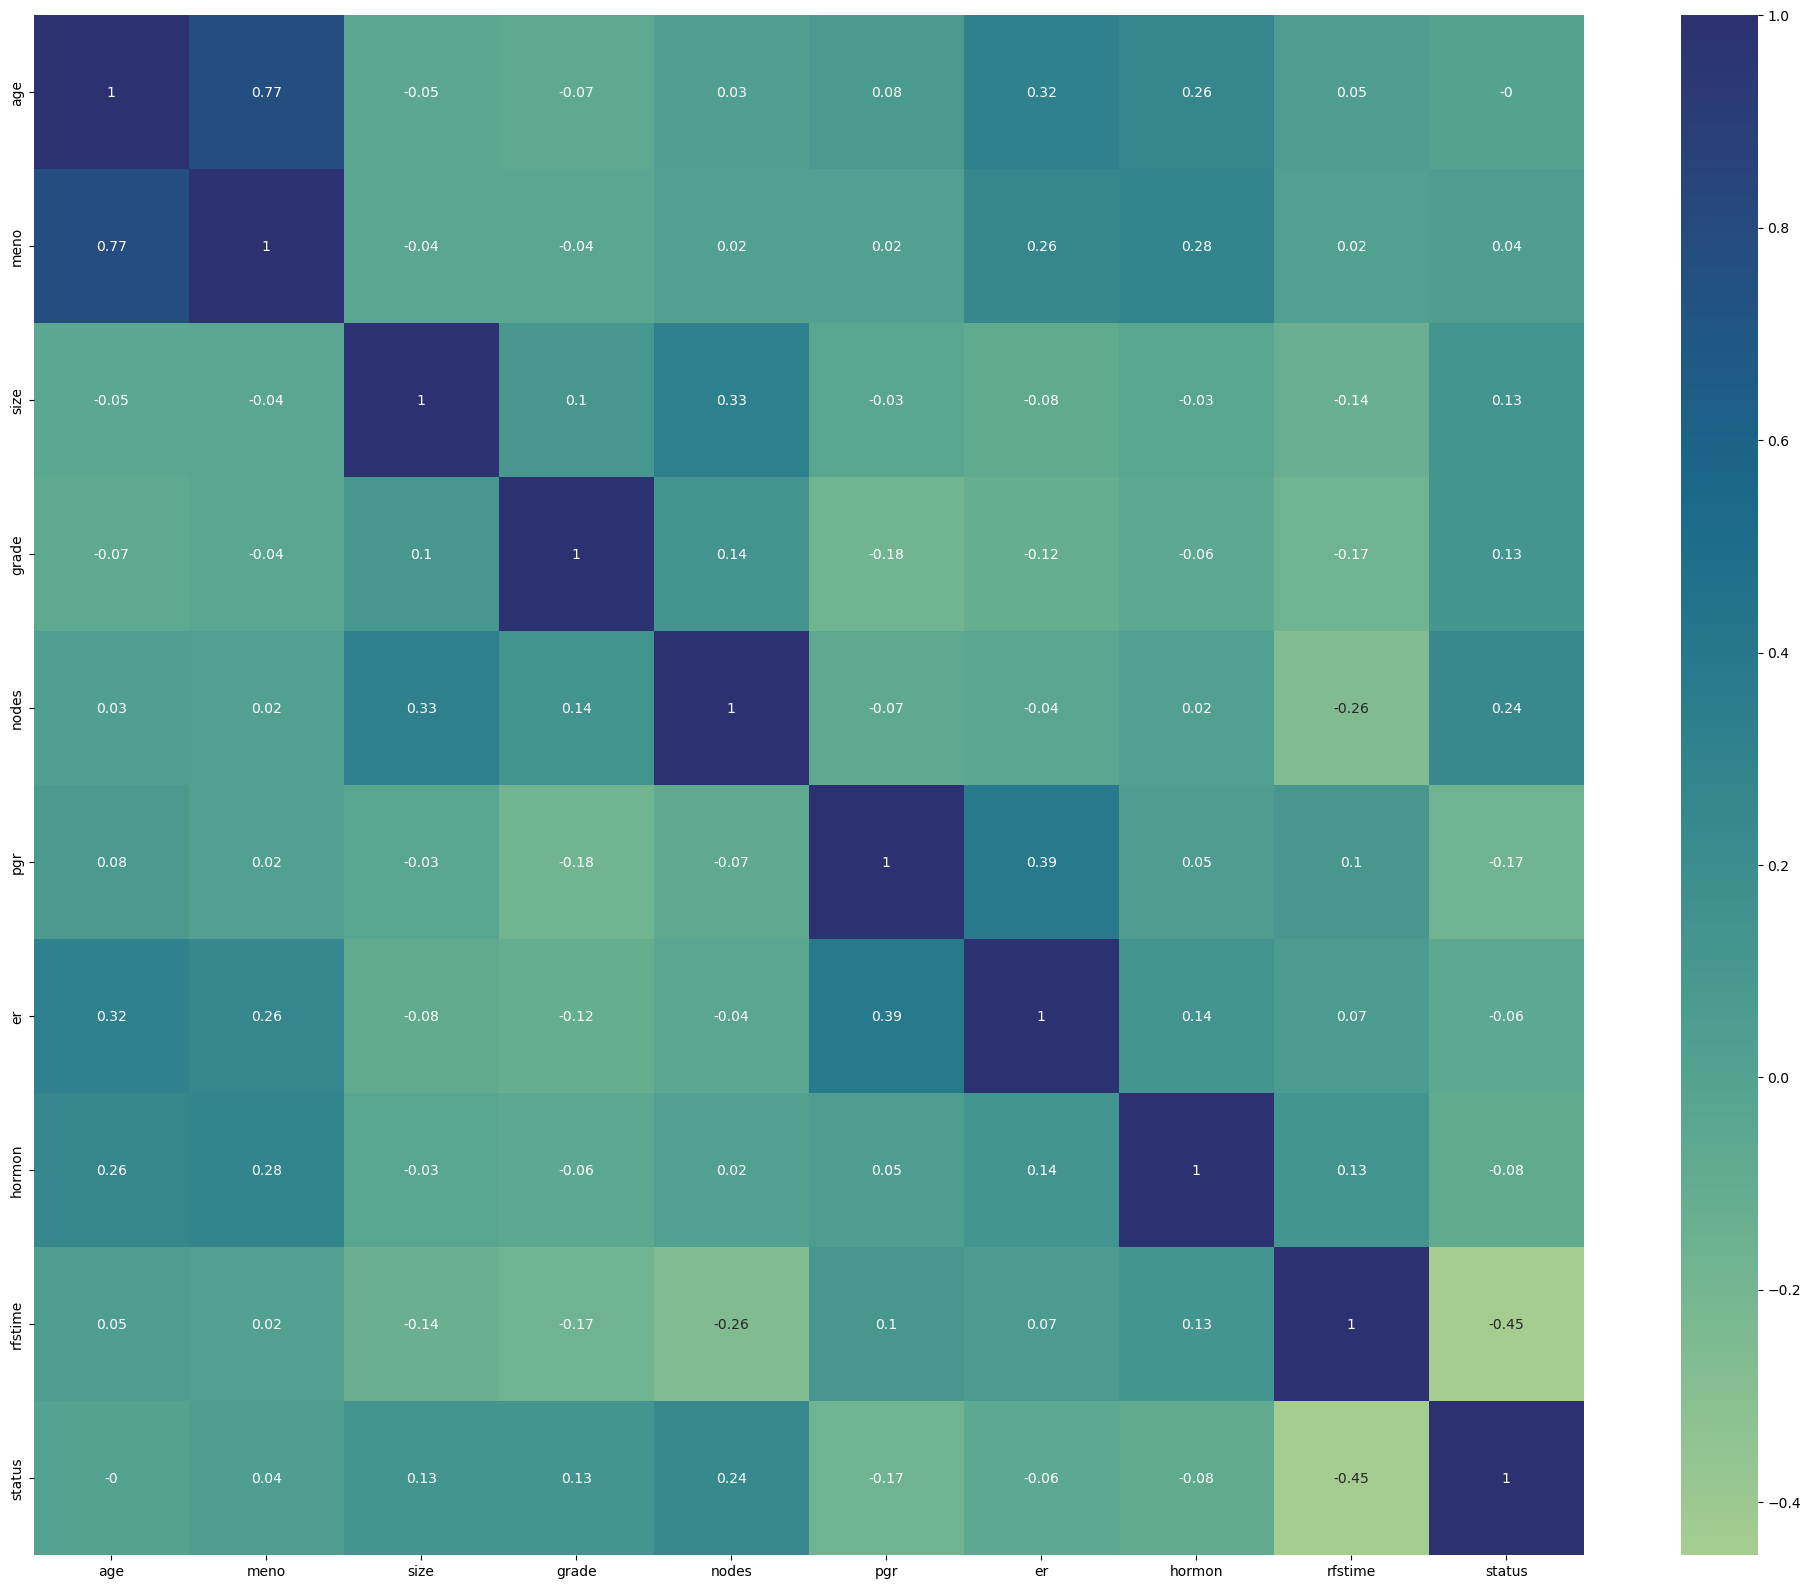

In [10]:
correlation_between_columns = dataset.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(correlation_between_columns, annot = True, cmap = 'crest')

Features that are highly impacting our result(Status) are nodes(number of positive lymph nodes), size(tumor size, mm) and grade(tumor grade)

# Data Preprocessing :

Dataset is split into Training, Validation, and Test data. Also data is being Normalized based on Mean and Standard Deviation.

In [11]:
X = dataset.drop("status", axis="columns").values
Y = dataset["status"].values

In [12]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, train_size=0.6, stratify=Y,random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp,random_state=42)

In [13]:
X.shape

(686, 9)

In [14]:
X_train.shape

(411, 9)

In [15]:
X_val.shape

(137, 9)

In [16]:
X_test.shape

(138, 9)

In [17]:
X_train[0]

array([  60,    1,   30,    2,    2,   92,   18,    1, 2296])

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train[0]

array([ 0.68985999,  0.8871057 ,  0.0125432 , -0.21312323, -0.53335886,
       -0.08027051, -0.53095631,  1.36898717,  1.72056848])

Text(0.5, 1.0, 'Explained variance by Principal components')

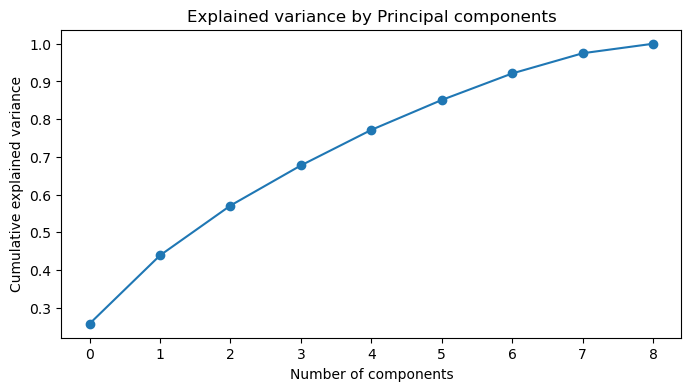

In [20]:
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize = (8,4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance by Principal components")

In [21]:
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
pca_reduced = PCA(n_components = n_components)
X_train = pca_reduced.fit_transform(X_train)
X_val = pca_reduced.fit_transform(X_val)
X_test = pca_reduced.fit_transform(X_test)

In [22]:
X_train.shape

(411, 8)

# Model Training :

# Random Forest Model :

In [23]:
random_forest_model = RandomForestClassifier(n_estimators = 800, max_depth = 10)
random_forest_model.fit(X_train,Y_train)
Y_pred_random_forest = random_forest_model.predict(X_val)
random_forest_accuracy = accuracy_score(Y_val,Y_pred_random_forest)
print(f"Accuracy Score:{random_forest_accuracy}")
random_forest_f1_score = f1_score(Y_val, Y_pred_random_forest, average='weighted')
print(f"F1 Score is:{random_forest_f1_score}")

Accuracy Score:0.5766423357664233
F1 Score is:0.5684245497806311


# Gradient Boosting Model :

In [24]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train,Y_train)
Y_pred_gradient_boosting = gradient_boosting_model.predict(X_val)
gradient_boosting_accuracy = accuracy_score(Y_val,Y_pred_gradient_boosting)
print(f"Accuracy Score:{gradient_boosting_accuracy}")
gradient_boosting_f1_score = f1_score(Y_val, Y_pred_gradient_boosting, average='weighted')
print(f"F1 Score:{gradient_boosting_f1_score}")

Accuracy Score:0.5109489051094891
F1 Score:0.5080068421924556


# Decision Tree Model :

In [25]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,Y_train)
Y_pred_decision_tree = decision_tree_model.predict(X_val)
decision_tree_accuracy = accuracy_score(Y_val,Y_pred_decision_tree)
print(f"Accuracy Score:{decision_tree_accuracy}")
decision_tree_f1_score = f1_score(Y_val, Y_pred_decision_tree, average='weighted')
print(f"F1 Score:{decision_tree_f1_score}")

Accuracy Score:0.45255474452554745
F1 Score:0.454607407650686


# Ada Boosting Model :

In [26]:
ada_boosting_model=AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
ada_boosting_model.fit(X_train,Y_train)
Y_pred_ada_boosting = ada_boosting_model.predict(X_val)
ada_boosting_accuracy = accuracy_score(Y_val,Y_pred_ada_boosting)
print(f"Accuracy Score:{ada_boosting_accuracy}")
ada_boosting_f1_score = f1_score(Y_val, Y_pred_ada_boosting, average='weighted')
print(f"F1 Score:{ada_boosting_f1_score}")

Accuracy Score:0.5474452554744526
F1 Score:0.5386607256275712


# KNeighbors Classifier Model :

In [27]:
knn_model=KNeighborsClassifier(n_neighbors=16)
knn_model.fit(X_train,Y_train)
Y_pred_knn = knn_model.predict(X_val)
knn_accuracy = accuracy_score(Y_val,Y_pred_knn)
print(f"Accuracy Score:{knn_accuracy}")
knn_f1_score = f1_score(Y_val, Y_pred_knn, average='weighted')
print(f"F1 Score:{knn_f1_score}")

Accuracy Score:0.6204379562043796
F1 Score:0.6147571495622056


# XGBoost Model :

In [28]:
xgb_model=XGBClassifier(n_estimators=800,learning_rate=0.1)
xgb_model.fit(X_train,Y_train)
Y_pred_xgb = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(Y_val,Y_pred_xgb)
print(f"Accuracy Score:{xgb_accuracy}")
xgb_f1_score = f1_score(Y_val, Y_pred_xgb, average='weighted')
print(f"F1 Score:{xgb_f1_score}")

Accuracy Score:0.5547445255474452
F1 Score:0.5532901552242293


# Cross Validation :

In [29]:
models = [
    ('Random Forest', random_forest_model),
    ('Gradient Boosting', gradient_boosting_model),
    ('Decision Tree', decision_tree_model),
    ('Ada Boosting', ada_boosting_model),
    ('KNeighbors Classifier', knn_model),
    ('XGBoost', xgb_model)
]

# Iterate through each model and perform cross-validation
for model_name, model in models:
    # Perform cross-validation with 5 folds
    cv_scores = cross_val_score(model, X_val, Y_val, cv=5)
    
    print(f"Model: {model_name}")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV Accuracy:", cv_scores.mean())
    print("==============================")

Model: Random Forest
Cross-validation scores: [0.64285714 0.67857143 0.77777778 0.62962963 0.59259259]
Mean CV Accuracy: 0.6642857142857144
Model: Gradient Boosting
Cross-validation scores: [0.53571429 0.57142857 0.74074074 0.66666667 0.55555556]
Mean CV Accuracy: 0.6140211640211641
Model: Decision Tree
Cross-validation scores: [0.85714286 0.64285714 0.74074074 0.62962963 0.55555556]
Mean CV Accuracy: 0.6851851851851851
Model: Ada Boosting
Cross-validation scores: [0.64285714 0.60714286 0.62962963 0.66666667 0.62962963]
Mean CV Accuracy: 0.6351851851851852
Model: KNeighbors Classifier
Cross-validation scores: [0.42857143 0.57142857 0.7037037  0.62962963 0.55555556]
Mean CV Accuracy: 0.5777777777777778
Model: XGBoost
Cross-validation scores: [0.60714286 0.64285714 0.62962963 0.62962963 0.55555556]
Mean CV Accuracy: 0.6129629629629629


# Hyperparameter tuning for top accuracy models :

# Hyperparameter tuning for Random forest :

In [30]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20)
}


random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist, n_iter=100, cv=5)


random_search.fit(X_val, Y_val)

# Get the best parameters and the best score
best_params_rand = random_search.best_params_
best_score_rand = random_search.best_score_

print("Best Parameters (Randomized Search):", best_params_rand)
print("Best Score (Randomized Search):", best_score_rand)

Best Parameters (Randomized Search): {'max_depth': 17, 'n_estimators': 159}
Best Score (Randomized Search): 0.6793650793650794


# Hyperparameter tuning for Gradient boosting

In [31]:
param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10)
}



random_search_gb = RandomizedSearchCV(estimator=gradient_boosting_model, param_distributions=param_dist_gb, n_iter=100, cv=5)

# Fit the randomized search to the data
random_search_gb.fit(X_val, Y_val)

# Get the best parameters and the best score
best_params_rand_gb = random_search_gb.best_params_
best_score_rand_gb = random_search_gb.best_score_

print("Best Parameters (Randomized Search - Gradient Boosting):", best_params_rand_gb)
print("Best Score (Randomized Search - Gradient Boosting):", best_score_rand_gb)

Best Parameters (Randomized Search - Gradient Boosting): {'learning_rate': 0.45777055717602777, 'max_depth': 7, 'n_estimators': 85}
Best Score (Randomized Search - Gradient Boosting): 0.7074074074074075


# Hyperparameter tuning for Ada Boosting

In [32]:
param_dist_ada = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.5),
}



random_search_ada = RandomizedSearchCV(estimator=ada_boosting_model, param_distributions=param_dist_ada, n_iter=100, cv=5)

# Fit the randomized search to the data
random_search_ada.fit(X_val, Y_val)

# Get the best parameters and the best score
best_params_rand_ada = random_search_ada.best_params_
best_score_rand_ada = random_search_ada.best_score_

print("Best Parameters (Randomized Search - AdaBoost):", best_params_rand_ada)
print("Best Score (Randomized Search - AdaBoost):", best_score_rand_ada)

Best Parameters (Randomized Search - AdaBoost): {'learning_rate': 0.09000782652782595, 'n_estimators': 87}
Best Score (Randomized Search - AdaBoost): 0.7010582010582012


# Hyperparameter tuning for XGBoost :

In [33]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10),
}




random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the data to find the best parameters
random_result = random_search.fit(X_val, Y_val)

# Get the best parameters and best accuracy
best_params_random = random_result.best_params_
best_accuracy_random = random_result.best_score_

print("Best Parameters (Randomized Search):", best_params_random)
print("Best Accuracy (Randomized Search):", best_accuracy_random)

Best Parameters (Randomized Search): {'learning_rate': 0.0179831261101071, 'max_depth': 4, 'n_estimators': 439}
Best Accuracy (Randomized Search): 0.5689210950080515


# Testing with test dataset :

# We have finalized Gradient boost model since it has higher accuracy after hyperparameter tuning...

In [34]:
Y_pred_final = gradient_boosting_model.predict(X_test)
final_accuracy = accuracy_score(Y_test,Y_pred_final)
print(f"Accuracy Score:{final_accuracy}")
final_f1_score = f1_score(Y_test, Y_pred_final, average='weighted')
print(f"F1 Score:{final_f1_score}")

Accuracy Score:0.5072463768115942
F1 Score:0.5061891924666287


# We can see that after hyperparameter tuning the accuracy of the Gradient boosting model have increased...